In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import mixed_precision
# import lib.lib_tf as lt
import math
import matplotlib.pyplot as plt


def plot_samples(data, n=5, max_cols=5, cmap="tab20"):
    n = min(len(data), n)
    if n < max_cols:
        rows = 1
        cols = n
    else:
        rows = math.ceil(n / max_cols)
        cols = max_cols
    print(f"rows: {rows}, cols: {cols}")
    fig, ax = plt.subplots(nrows=rows, ncols=cols, sharex=True, sharey=True, figsize=(20, 10))
    #ax = ax.flatten()
    index = 0
    for i in range(rows):
        for j in range(cols):
            img = data[index]
            index += 1
            #    .numpy().reshape(X.shape[1],X.shape[2],2)
            print()
            ax[i, j].imshow(img, cmap=cmap, interpolation='nearest')
            if index >= n:
                break

    #ax[0].set_xticks([])
    #ax[0].set_yticks([])
    plt.tight_layout()
    # plt.savefig('./figures/mnist_all.png', dpi=300)
    plt.show()

ModuleNotFoundError: No module named 'lib.lib_tf'

In [4]:
# Herunterladen der MNIST Daten als Trainings- und Testdaten
(mnist_images, mnist_labels), (mnist_images_test, mnist_labels_test) = tf.keras.datasets.mnist.load_data()

# Preprocessing der 
X_train = tf.cast(mnist_images[..., tf.newaxis] / 255, tf.float32)
y_train = tf.cast(mnist_labels, tf.int64)

X_test = tf.cast(mnist_images_test[..., tf.newaxis] / 255, tf.float32)
y_test = tf.cast(mnist_labels_test, tf.int64)

num_category = 10

y_train_v = tf.keras.utils.to_categorical(y_train, num_category)
y_test_v = tf.keras.utils.to_categorical(y_test, num_category)

dataset = tf.data.Dataset.from_tensor_slices(
    (tf.cast(mnist_images[..., tf.newaxis] / 255, tf.float32), tf.cast(mnist_labels, tf.int64)))
batch_size = 128
dataset = dataset.shuffle(1000).batch(batch_size)

dataset_test = tf.data.Dataset.from_tensor_slices((X_test, y_test))
dataset_test = dataset_test.shuffle(1000).batch(batch_size)

x_train, x_test = mnist_images / 255.0, mnist_images_test / 255.0

# Add a channels dimension
x_train = x_train[..., tf.newaxis].astype("float32")
x_test = x_test[..., tf.newaxis].astype("float32")
batch = 128
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(batch_size=batch)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

11490434/11490434 [==============================] - 1s 0us/step


2025-04-25 07:16:20.446607: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-04-25 07:16:20.497577: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [5]:
mnist_images.shape

(60000, 28, 28)

rows: 4, cols: 5






















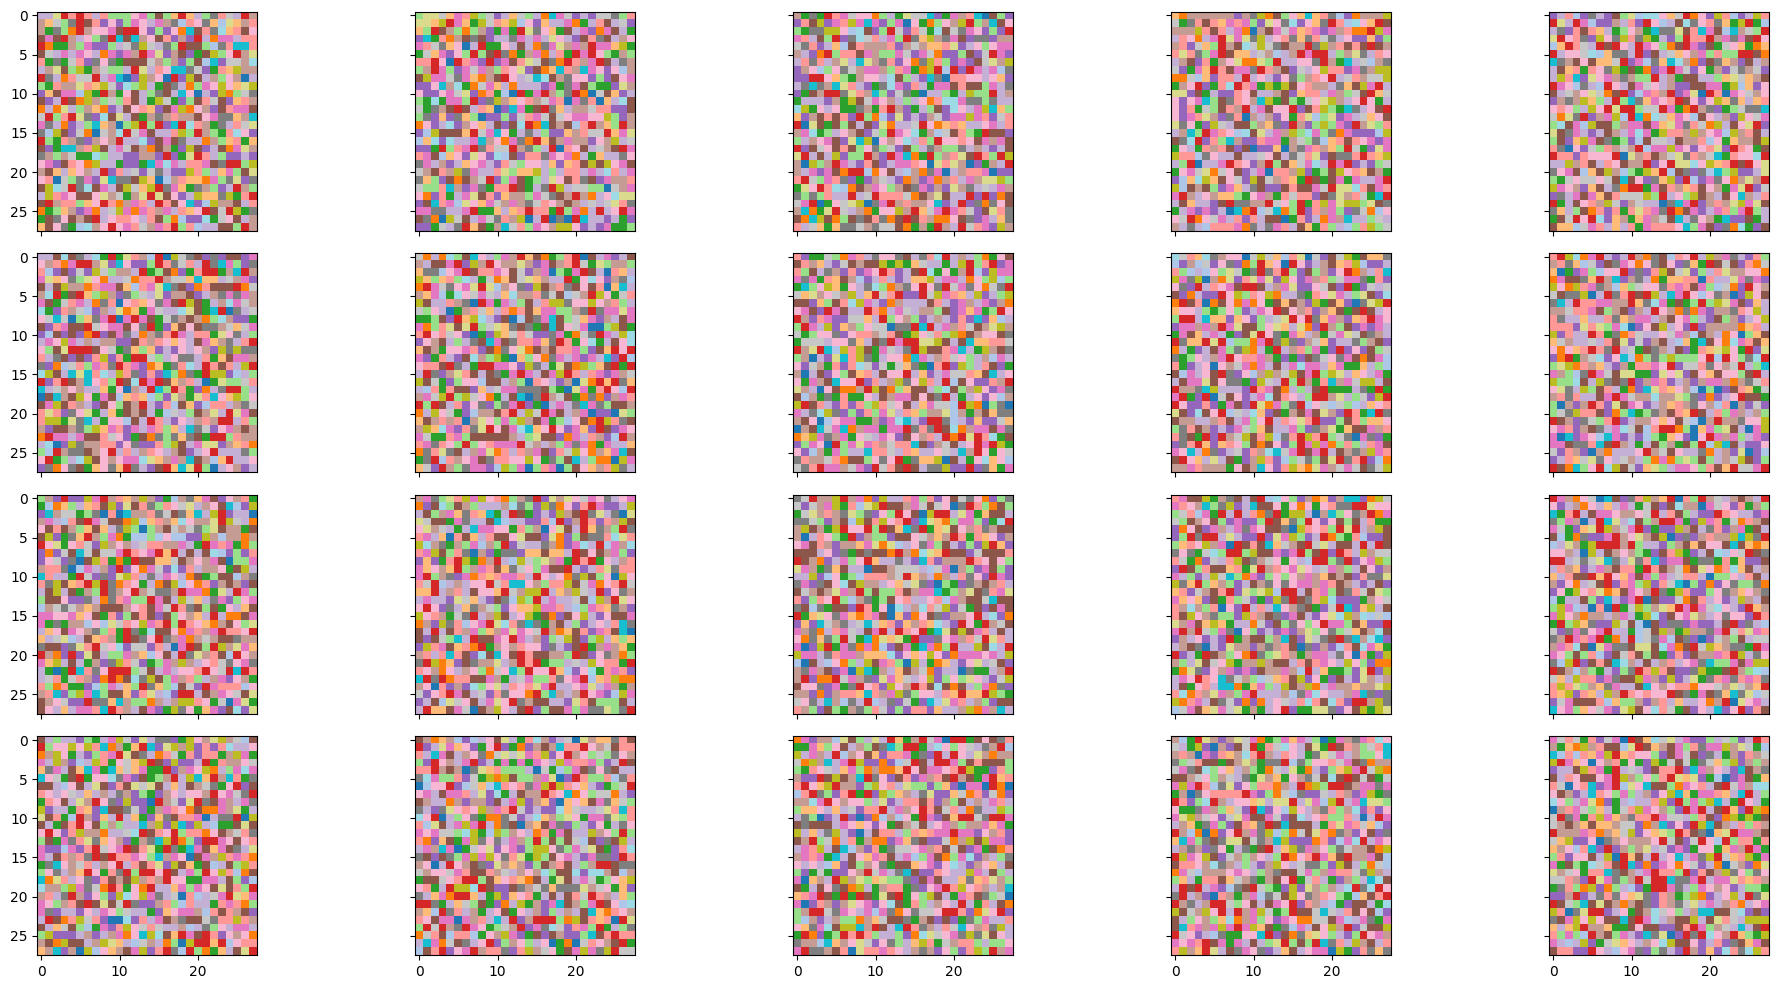

In [6]:
base_model = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(20, activation="relu", kernel_initializer="he_normal"),
        tf.keras.layers.Dense(10, activation="softmax", kernel_initializer="he_normal"),
    ]
)
base_model.build(input_shape=(None, 28, 28, 1))
opti = tf.keras.optimizers.SGD(
    learning_rate=0.02, momentum=0.00,
    nesterov=False, name='SGD'
)
opti2 = tf.keras.optimizers.Adadelta()
opti3 = tf.keras.optimizers.Adam()
# base_model.compile(loss=keras.losses.sparse_categorical_crossentropy,
#               optimizer=opti,
#               metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0.002, patience=2, mode='auto', verbose=True, restore_best_weights=True
)

base_model.compile(
    loss=keras.losses.sparse_categorical_crossentropy,
    optimizer=opti,
    metrics=['accuracy']
)

layer = base_model.layers[1].get_weights()[0]
images = [np.reshape(layer[:, i], (28, 28)) for i in range(20)]
plot_samples(images, n=20)
#base_model.build(input_shape=(None,28,28,1))


Epoch 1/15


2025-04-25 07:16:22.509212: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [60000,28,28,1]
	 [[{{node Placeholder/_0}}]]
2025-04-25 07:16:22.509425: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [60000]
	 [[{{node Placeholder/_1}}]]


469/469 [==============================] - 1s 717us/step - loss: 1.0343 - accuracy: 0.7211
Epoch 2/15
469/469 [==============================] - 0s 817us/step - loss: 0.4643 - accuracy: 0.8744
Epoch 3/15
469/469 [==============================] - 0s 826us/step - loss: 0.3837 - accuracy: 0.8926
Epoch 4/15
469/469 [==============================] - 0s 685us/step - loss: 0.3468 - accuracy: 0.9019
Epoch 5/15
469/469 [==============================] - 0s 726us/step - loss: 0.3243 - accuracy: 0.9074
Epoch 6/15
469/469 [==============================] - 0s 697us/step - loss: 0.3084 - accuracy: 0.9119
Epoch 7/15
469/469 [==============================] - 0s 743us/step - loss: 0.2963 - accuracy: 0.9159
Epoch 8/15
469/469 [==============================] - 0s 708us/step - loss: 0.2863 - accuracy: 0.9192
Epoch 9/15
469/469 [==============================] - 0s 752us/step - loss: 0.2779 - accuracy: 0.9212
Epoch 10/15
469/469 [==============================] - 0s 694us/step - loss: 0.2704 - accurac

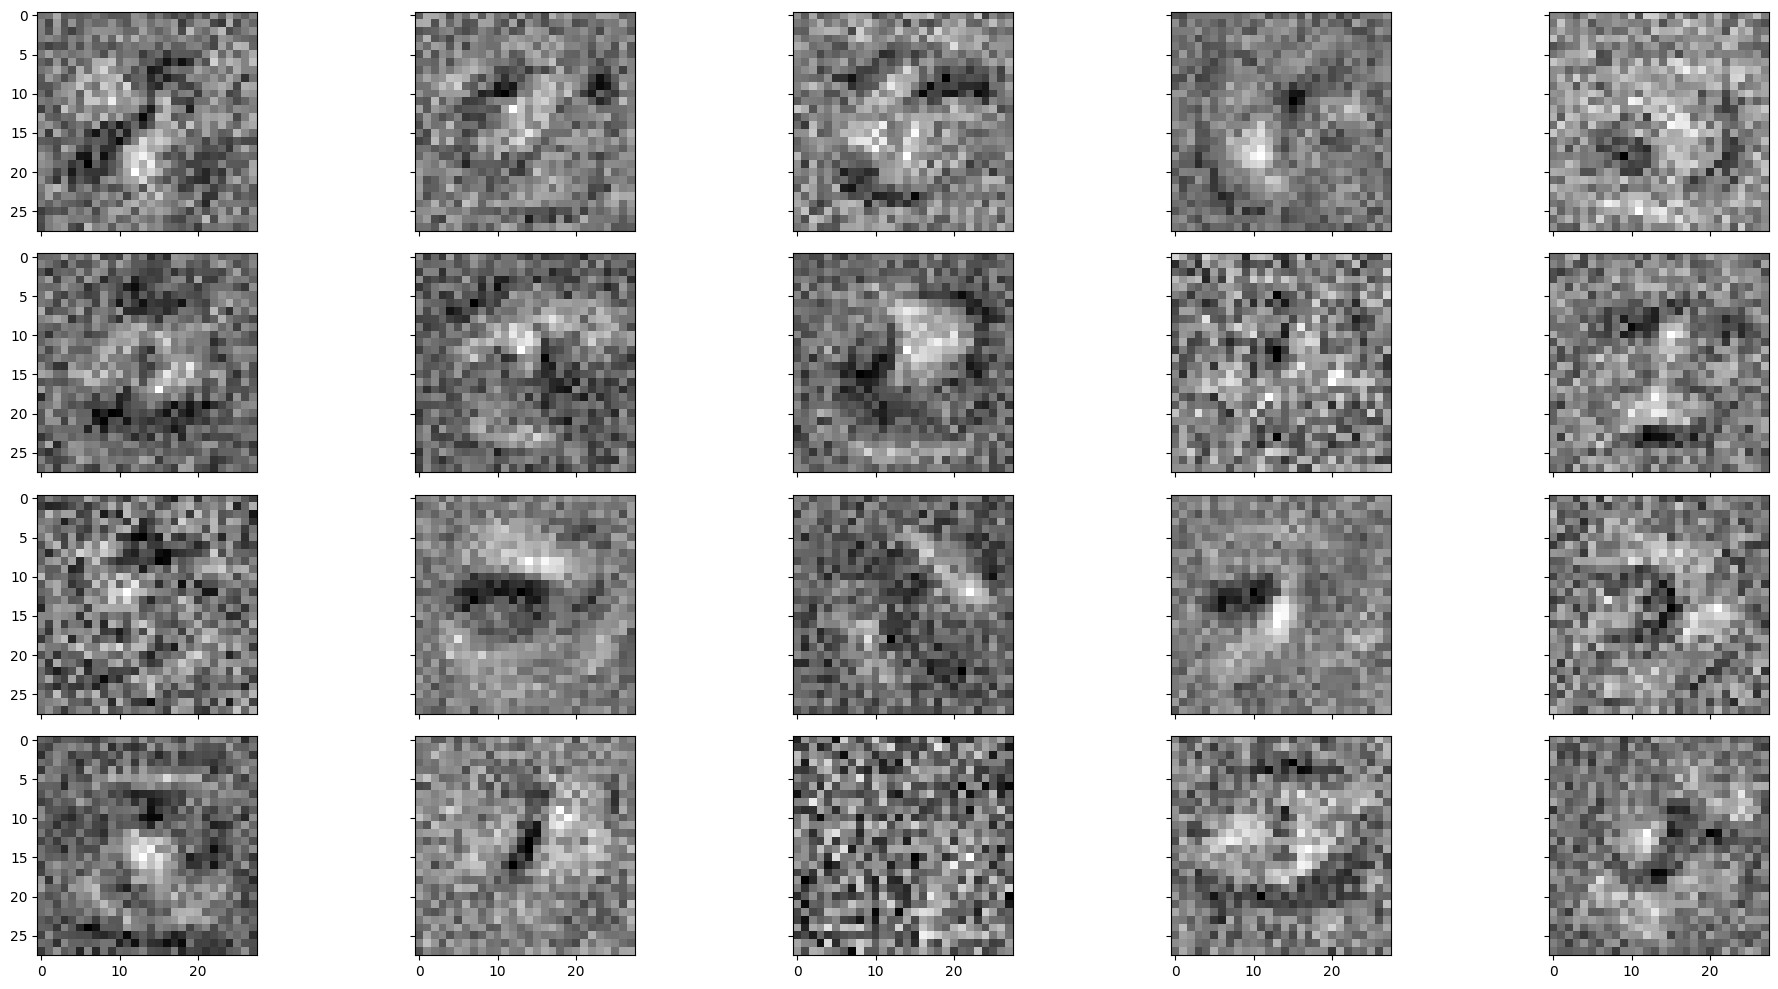

In [7]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='accuracy',  # Monitor validation loss
    patience=3,  # Stop after 3 epochs with no improvement
    verbose=1,  # Print stopping info
    min_delta=0.001,  # Minimum change in loss
    restore_best_weights=True  # Restore weights from the best epoch
)
base_model.fit(dataset, epochs=15, callbacks=[early_stopping])
# lt.eval_model(
#         base_model, X_train, y_train, X_test, y_test,
#         epochs=20, batch_size=64, callbacks=[early_stopping]
#         )
layer_1_weights = base_model.layers[1].get_weights()[0].copy()
layer = base_model.layers[1].get_weights()[0]
images = [np.reshape(layer[:, i], (28, 28)) for i in range(20)]
plot_samples(images, n=20, cmap="grey")

rows: 4, cols: 5






















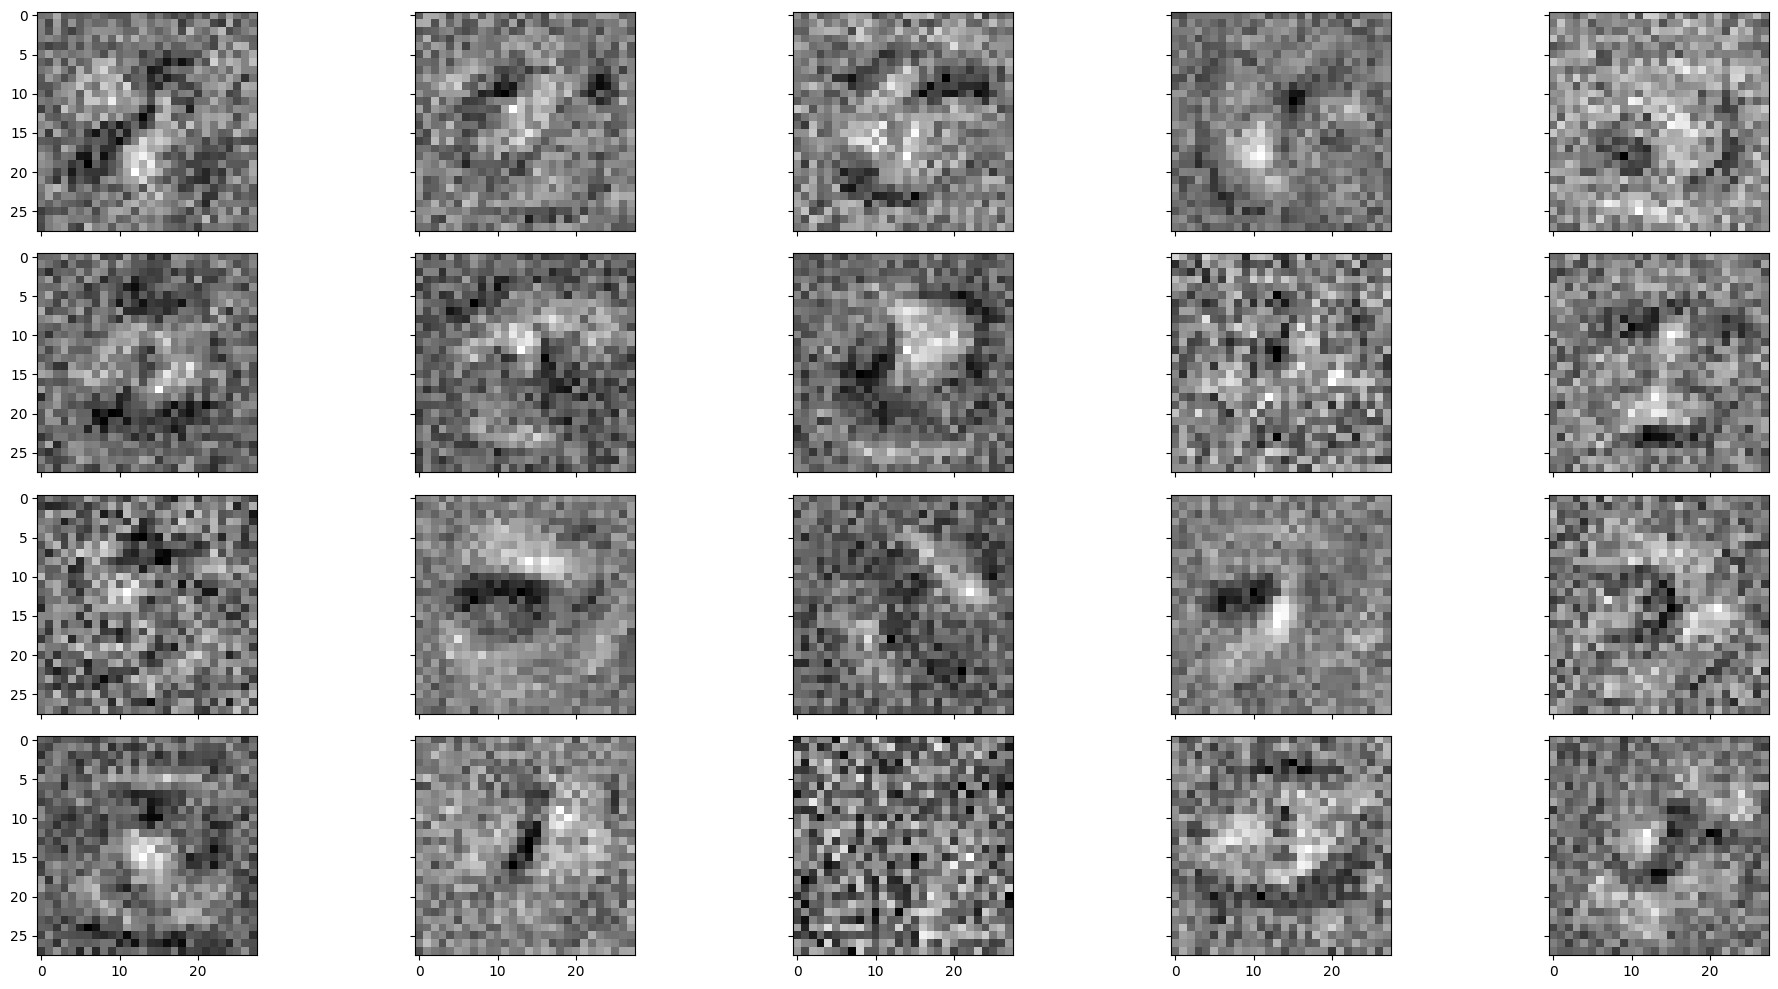

In [8]:
plot_samples(images, n=20, cmap="grey")

In [9]:
base_model.evaluate(X_test, y_test, verbose=0)

[0.23263615369796753, 0.9330000281333923]

In [10]:
abaltion_weights = layer_1_weights.copy()
abaltion_weights[:, 6] = 0
abaltion_weights[:, 14] = 0
base_model.layers[1].set_weights([abaltion_weights, base_model.layers[1].get_weights()[1]])
# print(base_model.layers[1].get_weights()[0][:, 0])
base_model.evaluate(X_test, y_test, verbose=0)

[0.5607523918151855, 0.8170999884605408]

In [11]:
abaltion_weights.shape

(784, 20)

rows: 4, cols: 5






















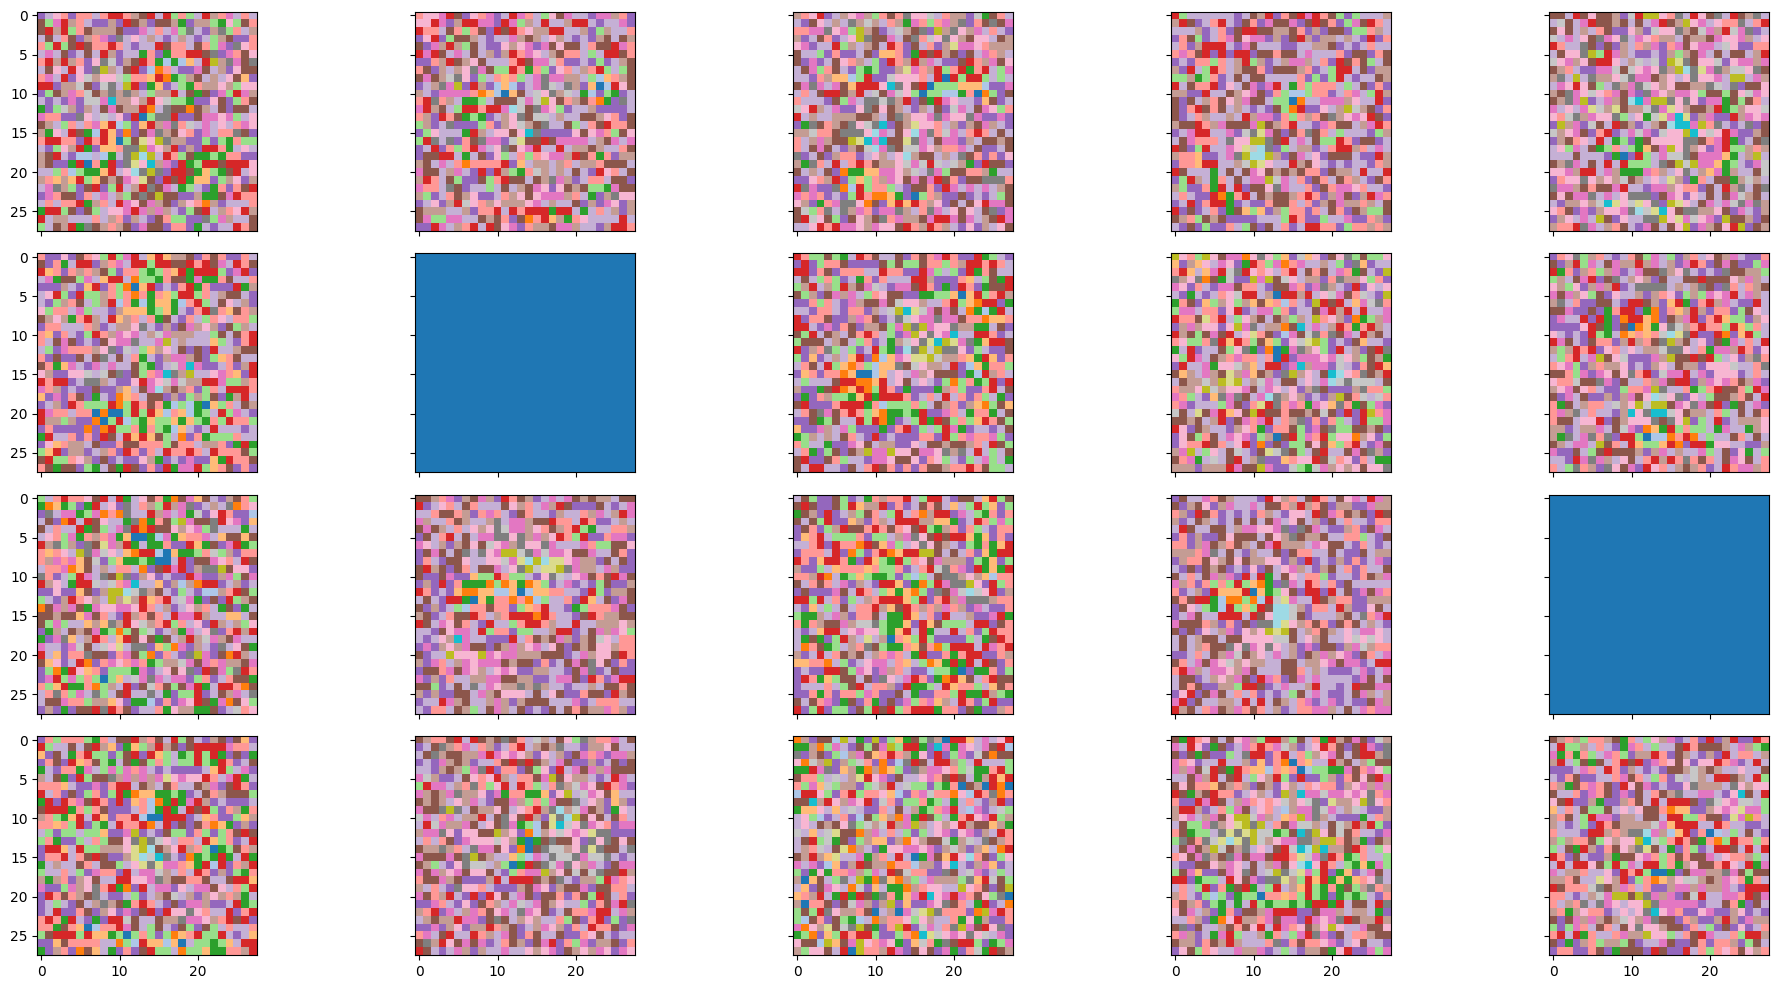

In [12]:
layer = base_model.layers[1].get_weights()[0]
images = [np.reshape(layer[:, i], (28, 28)) for i in range(20)]
plot_samples(images, n=20)

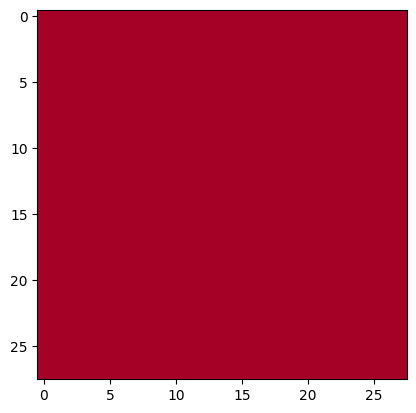

In [13]:
img = np.reshape(layer[:, 6], (28, 28))
plt.imshow(img, cmap='RdYlBu', interpolation='nearest')

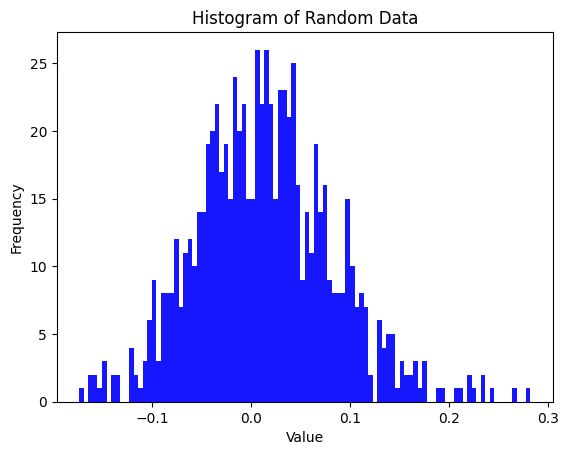

In [14]:
#unit_weights = base_model.layers[1].get_weights()[0][:,5]
unit_weights = layer_1_weights[:, 15]
img = np.reshape(unit_weights, (28, 28))
data = img.flatten()
plt.hist(data, bins=100, color='blue', alpha=0.7)
plt.hist(data, bins=100, color='blue', alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Random Data')
plt.show()

rows: 4, cols: 5






















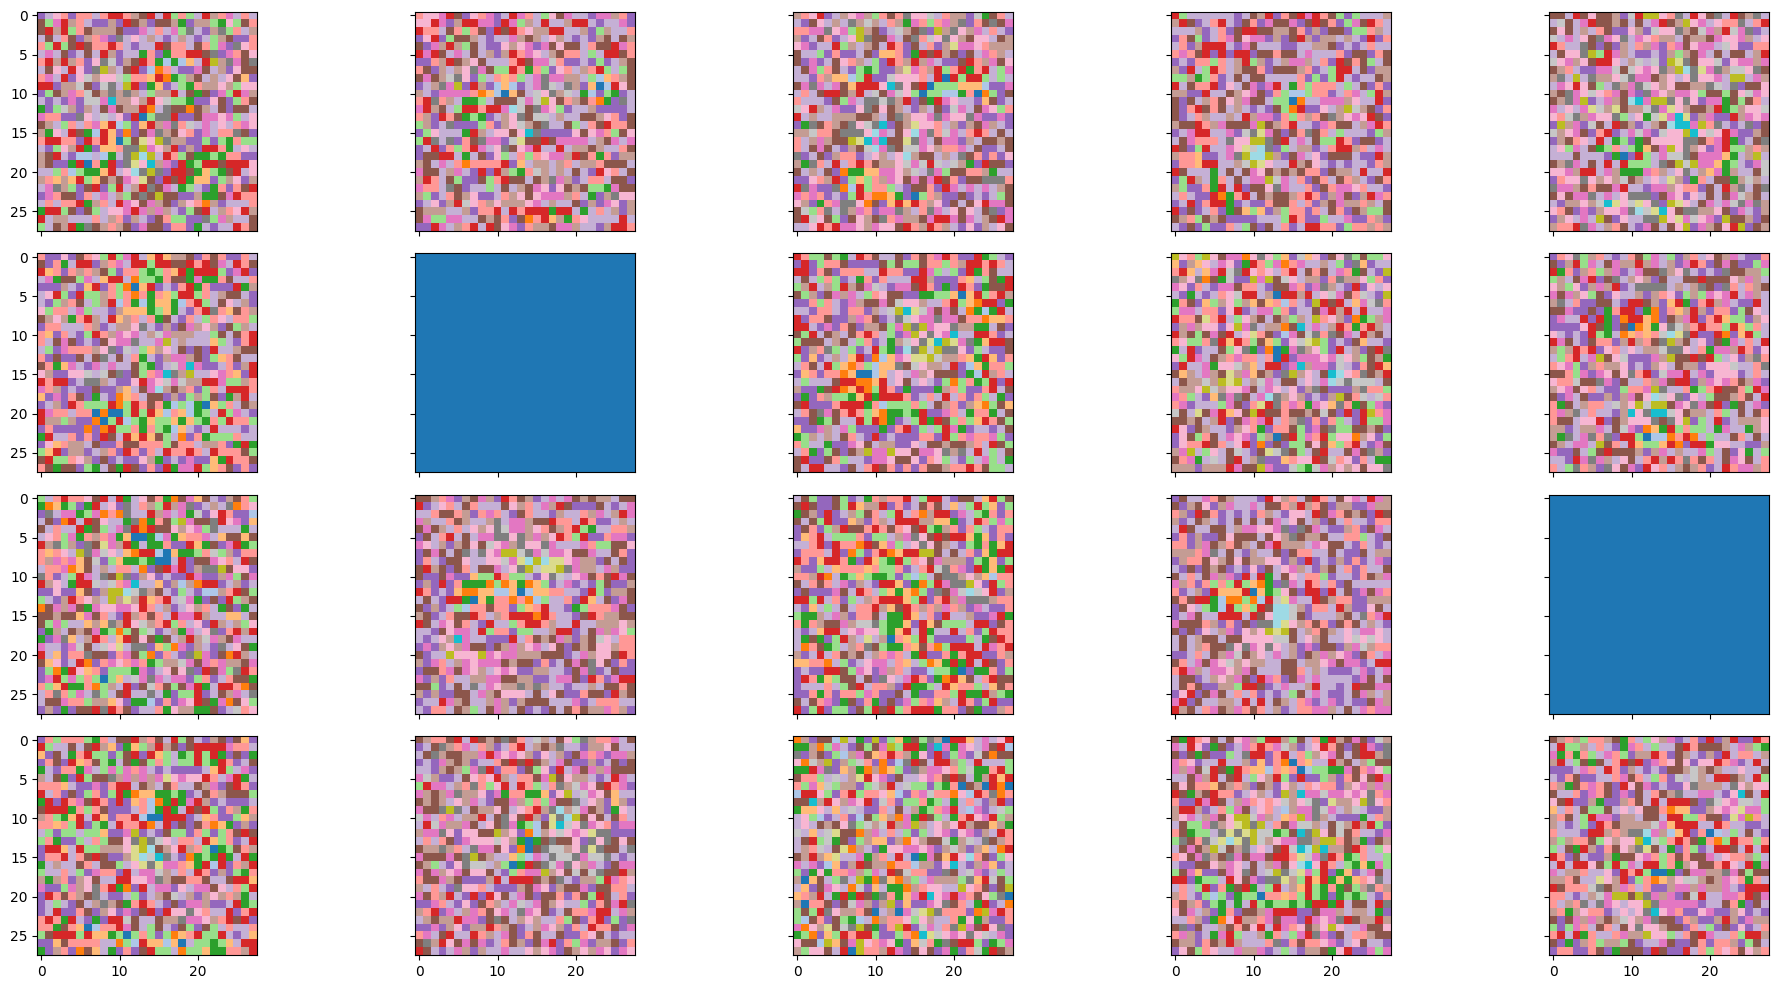

In [21]:
images = [np.reshape(layer[:, i], (28, 28)) for i in range(20)]
plot_samples(images, n=20)

In [ ]:
m1 = tf.keras.Sequential(
        name="2D-Conv", layers=[
                tf.keras.layers.Conv2D(filters=16, kernel_size=[3, 3], activation='relu', input_shape=(28, 28, 1)),
                #    tf.keras.layers.Conv2D(filters=32,kernel_size=[3,3], activation='relu'),
                #    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                #    tf.keras.layers.Dropout(0.25),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(16, activation='relu'),
                tf.keras.layers.Dense(10, activation='softmax')
                ]
        )
m1.compile(
        loss=keras.losses.sparse_categorical_crossentropy,
        optimizer=opti3,
        metrics=['accuracy']
        )

# lt.eval_model(m1, X_train, y_train, X_test, y_test, epochs=12, batch_size=128)


Model: "2D-Conv"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 flatten_2 (Flatten)         (None, 10816)             0         
                                                                 
 dense_4 (Dense)             (None, 16)                173072    
                                                                 
 dense_5 (Dense)             (None, 10)                170       
                                                                 
Total params: 173,402
Trainable params: 173,402
Non-trainable params: 0
_________________________________________________________________


In [17]:
img = X_train[0:1, :, :, :]
print(img.shape)
m1(img)

(1, 28, 28, 1)


<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[0.09352224, 0.09548414, 0.09607426, 0.10709969, 0.11760763,
        0.08242852, 0.10058759, 0.10177847, 0.10559735, 0.0998202 ]],
      dtype=float32)>

(1, 26, 26, 16)
rows: 4, cols: 5


















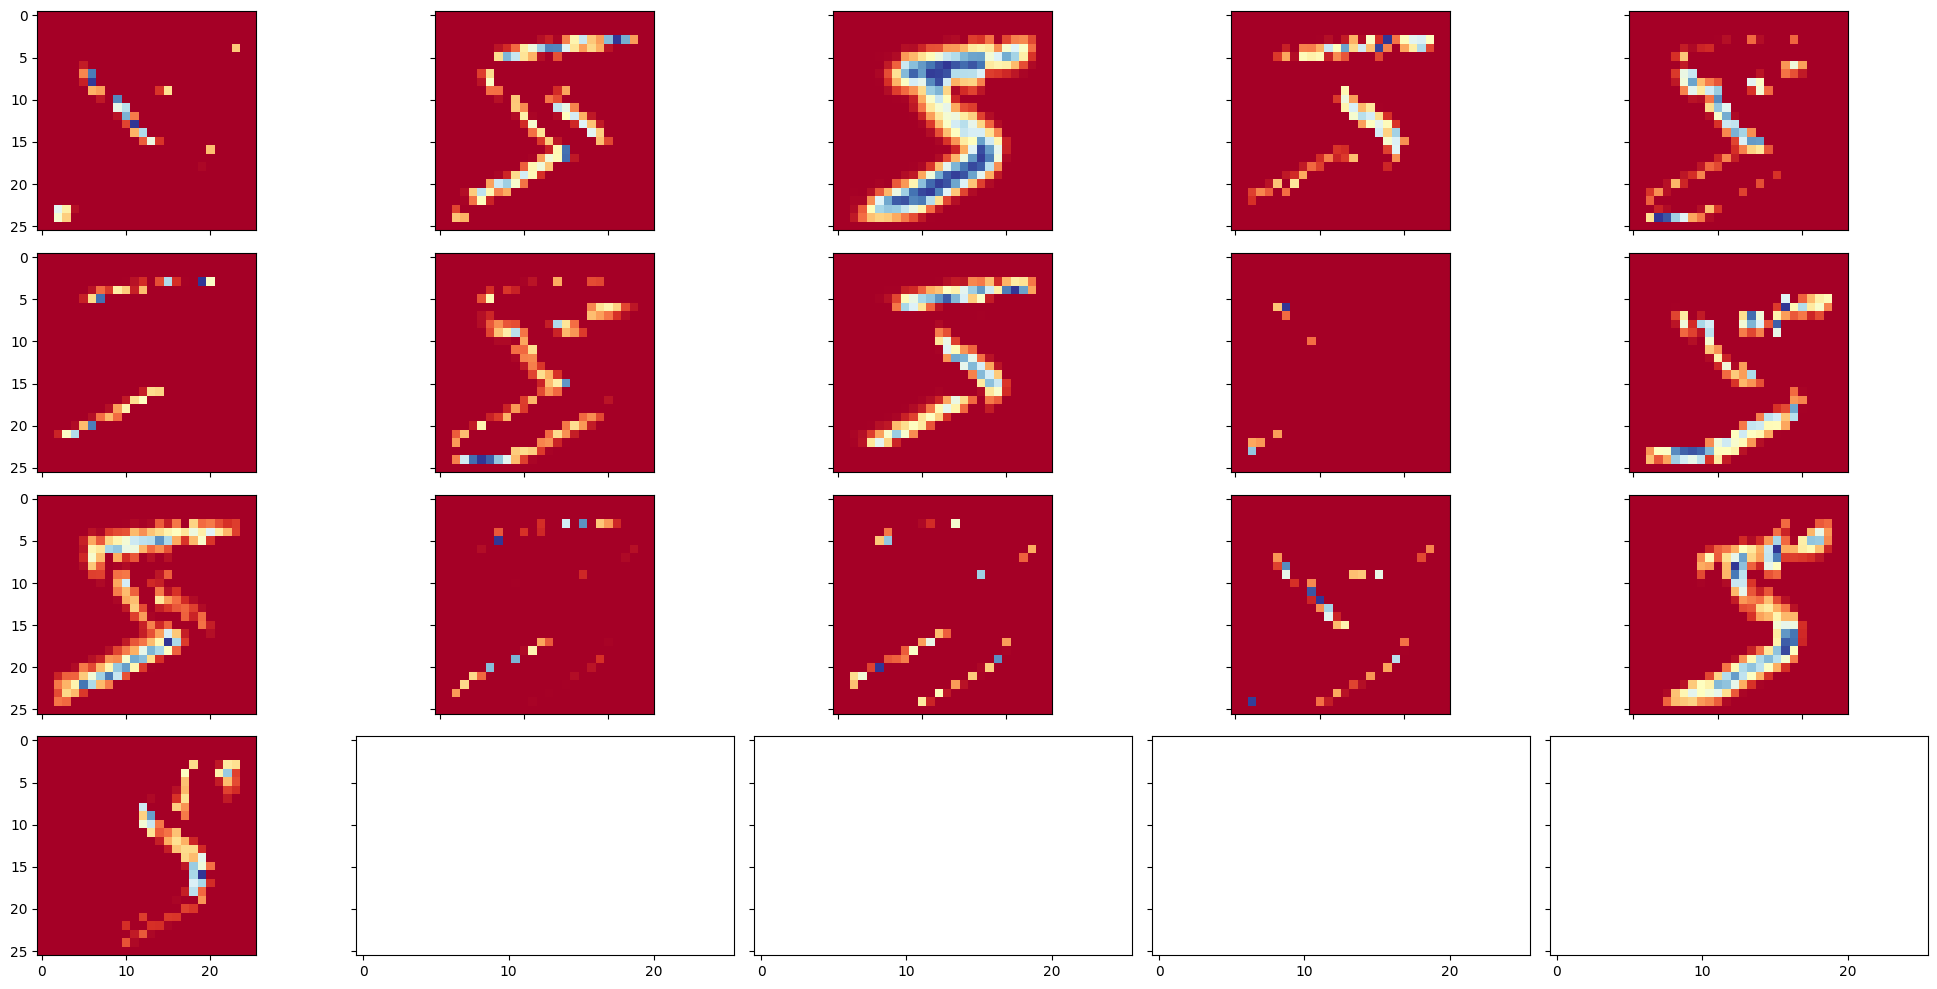

In [22]:
conv = m1.layers[0](img)
print(conv.shape)

def plot_samples(data, n=5, max_cols=5):
    n = min(len(data), n)
    if n < max_cols:
        rows = 1
        cols = n
    else:
        rows = math.ceil(n / max_cols)
        cols = max_cols
    print(f"rows: {rows}, cols: {cols}")
    fig, axes = plt.subplots(nrows=rows, ncols=cols, sharex=True, sharey=True, figsize=(20, 10))
    #ax = ax.flatten()
    index = 0
    for i in range(rows):
        for j in range(cols):
            img = data[index]
            index += 1
            #    .numpy().reshape(X.shape[1],X.shape[2],2)
            print()
            axes[i, j].imshow(img, cmap='RdYlBu', interpolation='nearest')
            if index >= n:
                break

    #ax[0].set_xticks([])
    #ax[0].set_yticks([])
    plt.tight_layout()
    # plt.savefig('./figures/mnist_all.png', dpi=300)
    plt.show()

conv_img = [conv[0, :, :, i] for i in range(16)]
plot_samples(conv_img, n=16)


In [23]:
import math

math.ceil(9 / 5)

2

In [ ]:
filters = m1.layers[2].get_weights()[0]
print(filters.shape)

(10816, 16)


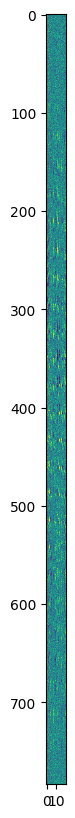

In [25]:
import matplotlib.pyplot as plt

data = base_model.layers[1].get_weights()[0]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
ax.imshow(data, interpolation='nearest')

In [26]:
def plot_samples(data):
    fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True, figsize=(20, 10))
    ax = ax.flatten()
    for i in range(len(data)):
        img = data[i, :, :]
        #    .numpy().reshape(X.shape[1],X.shape[2],2)
        print()
        ax[i].imshow(img, cmap='Greys', interpolation='nearest')

    ax[0].set_xticks([])
    ax[0].set_yticks([])
    plt.tight_layout()
    # plt.savefig('./figures/mnist_all.png', dpi=300)
    plt.show()


def plot_conv_img(convolved_image):
    fig, ax = plt.subplots(nrows=1, ncols=4, sharex=True, sharey=True, figsize=(20, 10))
    ax = ax.flatten()
    for cv in range(4):
        image = convolved_image[:, :, cv]
        #    .numpy().reshape(X.shape[1],X.shape[2],2)
        ax[cv].imshow(image, cmap='Greys', interpolation='nearest')
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    plt.tight_layout()
    # plt.savefig('./figures/mnist_all.png', dpi=300)
    plt.show()


def plot_conv_imgages(data):
    for i in range(10):  # image
        plot_conv_img(data[i, :, :, :])


In [27]:
base_model.fit(dataset, epochs=15, callbacks=[early_stopping])
base_model.evaluate(dataset_test)

Epoch 1/15
469/469 [==============================] - 1s 1ms/step - loss: 0.2575 - accuracy: 0.9276
Epoch 2/15
469/469 [==============================] - 1s 1ms/step - loss: 0.2377 - accuracy: 0.9332
Epoch 3/15
469/469 [==============================] - 1s 1ms/step - loss: 0.2304 - accuracy: 0.9351
Epoch 4/15
469/469 [==============================] - 0s 1ms/step - loss: 0.2249 - accuracy: 0.9369
Epoch 5/15
469/469 [==============================] - 0s 717us/step - loss: 0.2197 - accuracy: 0.9380
Epoch 6/15
469/469 [==============================] - 0s 735us/step - loss: 0.2152 - accuracy: 0.9390
Epoch 7/15
469/469 [==============================] - 0s 689us/step - loss: 0.2108 - accuracy: 0.9404
Epoch 8/15
469/469 [==============================] - 0s 684us/step - loss: 0.2067 - accuracy: 0.9413
Epoch 9/15
469/469 [==============================] - 0s 696us/step - loss: 0.2029 - accuracy: 0.9424
Epoch 10/15
469/469 [==============================] - 0s 754us/step - loss: 0.1992 - accu

2025-04-25 07:41:37.428231: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [10000,28,28,1]
	 [[{{node Placeholder/_0}}]]
2025-04-25 07:41:37.430462: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [10000]
	 [[{{node Placeholder/_1}}]]


[0.1851682811975479, 0.9463000297546387]

In [28]:
result = lt.eval_model_opt(
    base_model, X_train, y_train, X_test, y_test, num_epochs=12,
    batch_size=128, optimizer=opti3, callbacks=[early_stopping]
)

NameError: name 'lt' is not defined